In [42]:
# É necessário antes de tudo instalar a biblioteca medmnist
# Importações
import numpy as np
from matplotlib import pyplot as plt
import os 
from tqdm import tqdm
import medmnist
from medmnist import INFO, Evaluator

## Importando a base de dados Breastmnist

In [2]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v2.1.0 @ https://github.com/MedMNIST/MedMNIST/


In [4]:
# Importando o dataset breastmnist
data_flag = 'breastmnist'
download = True

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [6]:
# carregando os dados
train_dataset = DataClass(split='train', download=download)
val_dataset = DataClass(split='val', download=download)
test_dataset = DataClass(split='test', download=download)

  0%|          | 0/559580 [00:00<?, ?it/s]

Using downloaded and verified file: C:\Users\Luis\.medmnist\breastmnist.npz
Using downloaded and verified file: C:\Users\Luis\.medmnist\breastmnist.npz


In [7]:
print(train_dataset)

Dataset BreastMNIST (breastmnist)
    Number of datapoints: 546
    Root location: C:\Users\Luis\.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0


In [8]:
print(val_dataset)

Dataset BreastMNIST (breastmnist)
    Number of datapoints: 78
    Root location: C:\Users\Luis\.medmnist
    Split: val
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0


In [9]:
print(test_dataset)

Dataset BreastMNIST (breastmnist)
    Number of datapoints: 156
    Root location: C:\Users\Luis\.medmnist
    Split: test
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0


In [43]:
# Separando os labels por conjuntos:
train_labels = train_dataset.labels
val_labels = val_dataset.labels
test_labels = test_dataset.labels

In [44]:
# Separando as images por conjuntos:
train_img = train_dataset.imgs
val_img = val_dataset.imgs
test_img = test_dataset.imgs

In [16]:
print(train_img.shape)
print(val_img.shape)
print(test_img.shape)

(546, 28, 28)
(78, 28, 28)
(156, 28, 28)


In [19]:
print(train_img[0].shape)

(28, 28)


Rótulo: [1]


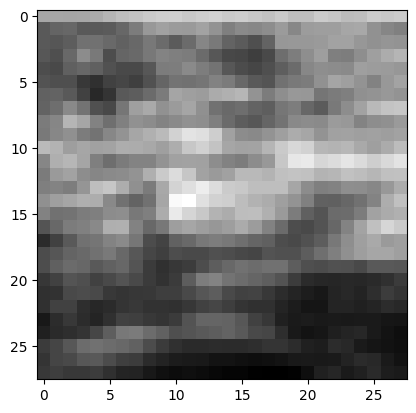

In [63]:
# Vizualização da primeira imagem do conjunto de treinamento
print(f"Rótulo: {train_labels[0]}")
plt.imshow(train_img[0],cmap="gray")

Rótulo: [0]


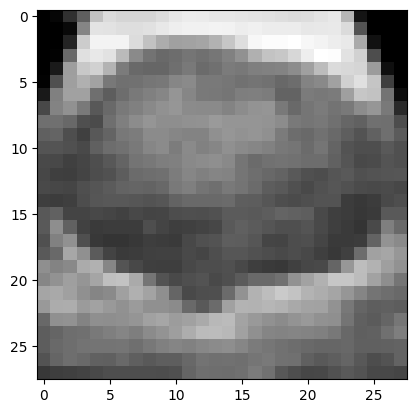

In [64]:
# Vizualização da quarta imagem do conjunto de treinamento
print(f"Rótulo: {train_labels[4]}")
plt.imshow(train_img[4],cmap="gray")

## Análise do balanceamento das classes nos conjuntos disponíveis

In [54]:
# Conjunto de treino
num_negativas_t = (train_labels==0).sum()
num_positivas_t = (train_labels==1).sum()
p_negativas_t = num_negativas_t*100/len(train_labels)
p_positivas_t = num_positivas_t*100/len(train_labels)
print("No conjunto de treinamento há",num_negativas_t, "classes negativas")
print("Porcentagem de classes negativas:",p_negativas_t,"%")
print("No conjunto de treinamento há",num_positivas_t, "classes positivas")
print("Porcentagem de classes positivas:",p_positivas_t,"%")

No conjunto de treinamento há 147 classes negativas
Porcentagem de classes negativas: 26.923076923076923 %
No conjunto de treinamento há 399 classes positivas
Porcentagem de classes positivas: 73.07692307692308 %


In [57]:
# Conjunto de validação
num_negativas_v = (val_labels==0).sum()
num_positivas_v = (val_labels==1).sum()
p_negativas_v = num_negativas_v*100/len(val_labels)
p_positivas_v = num_positivas_v*100/len(val_labels)
print("No conjunto de validação há",num_negativas_v, "classes negativas")
print("Porcentagem de classes negativas:",p_negativas_v,"%")
print("No conjunto de validação há",num_positivas_v, "classes positivas")
print("Porcentagem de classes positivas:",p_positivas_v,"%")

No conjunto de validação há 21 classes negativas
Porcentagem de classes negativas: 26.923076923076923 %
No conjunto de validação há 57 classes positivas
Porcentagem de classes positivas: 73.07692307692308 %


In [60]:
# Conjunto de teste
num_negativas_tt = (test_labels==0).sum()
num_positivas_tt = (test_labels==1).sum()
p_negativas_tt = num_negativas_tt*100/len(test_labels)
p_positivas_tt = num_positivas_tt*100/len(test_labels)
print("No conjunto de teste há",num_negativas_tt, "classes negativas")
print("Porcentagem de classes negativas:",p_negativas_tt,"%")
print("No conjunto de teste há",num_positivas_tt, "classes positivas")
print("Porcentagem de classes positivas:",p_positivas_tt,"%")

No conjunto de teste há 42 classes negativas
Porcentagem de classes negativas: 26.923076923076923 %
No conjunto de teste há 114 classes positivas
Porcentagem de classes positivas: 73.07692307692308 %
